# 뉴스 기사 분류: multiclass classification

In [1]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [7]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
# 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
# 레이블 원-핫 인코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
# 내장함수를 이용한 원-핫 인코딩
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [19]:
# 모델 컴파일하기
model.compile(optimizer = 'rmsprop',
                         loss = 'categorical_crossentropy',
                         metrics = ['accuracy'])

In [20]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
# 모델 훈련하기
history = model.fit(partial_x_train, partial_y_train,
                               epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 72ms/step - loss: 2.5414 - accuracy: 0.5197 - val_loss: 1.6755 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 35ms/step - loss: 1.3931 - accuracy: 0.7065 - val_loss: 1.2920 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0548 - accuracy: 0.7757 - val_loss: 1.1298 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8356 - accuracy: 0.8178 - val_loss: 1.0269 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6689 - accuracy: 0.8522 - val_loss: 0.9743 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5345 - accuracy: 0.8869 - val_loss: 0.9242 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4309 - accuracy: 0.9118 - val_loss: 0.9098 - val_accuracy: 0.8140
Epoch 8/20
16

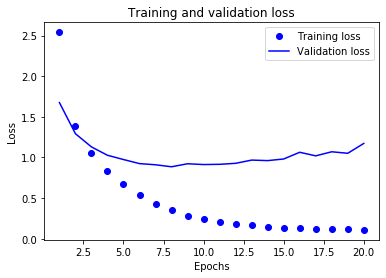

In [23]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

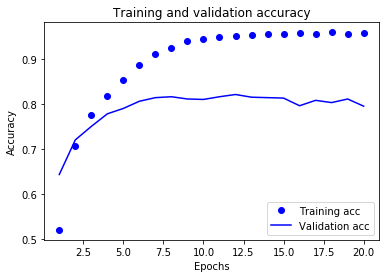

In [28]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc  = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 42ms/step - loss: 2.5077 - acc: 0.5438 - val_loss: 1.6574 - val_acc: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.3577 - acc: 0.7073 - val_loss: 1.2792 - val_acc: 0.7320
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.0099 - acc: 0.7804 - val_loss: 1.1329 - val_acc: 0.7570
Epoch 4/9
16/16 [==============================] - 0s 29ms/step - loss: 0.7947 - acc: 0.8326 - val_loss: 1.0157 - val_acc: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.6352 - acc: 0.8677 - val_loss: 0.9711 - val_acc: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 31ms/step - loss: 0.5073 - acc: 0.8945 - val_loss: 0.9380 - val_acc: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4078 - acc: 0.9176 - val_loss: 0.9145 - val_acc: 0.8120
Epoch 8/9
16/16 [==============================] - 0s 19ms/step - loss: 0.3333 - acc: 0.92

In [33]:
# 무작위로 분류했을 때 성능
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18788958147818344

In [34]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [36]:
# 가장 확률이 높은 클래스
np.argmax(predictions[0])

3

In [37]:
# 레이블을 정수 텐서로 인코딩하기
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [38]:
# 정수 레이블 사용 시 sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
# 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 19ms/step - loss: 3.2778 - acc: 0.2063 - val_loss: 2.8192 - val_acc: 0.2590
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.4605 - acc: 0.2839 - val_loss: 2.1138 - val_acc: 0.3080
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.6681 - acc: 0.5802 - val_loss: 1.4812 - val_acc: 0.6490
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2303 - acc: 0.6961 - val_loss: 1.3131 - val_acc: 0.6920
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.0545 - acc: 0.7415 - val_loss: 1.2713 - val_acc: 0.7030
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9439 - acc: 0.7731 - val_loss: 1.2772 - val_acc: 0.7100
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8574 - acc: 0.7927 - val_loss: 1.2442 - val_acc: 0.7170
Epoch 8/20
63/63 [==============================] - 1s 12ms/step - loss: 0.7843 - acc